In [3]:
import os
import pandas as pd
import numpy as np
from IPython.display import display
%matplotlib inline
training_file_path = os.path.expanduser(
    '~/Documents/machine_learning_projects/predicting_backorders/Kaggle_Training_Dataset_v2.csv')
testing_file_path = os.path.expanduser(
    '~/Documents/machine_learning_projects/predicting_backorders/Kaggle_Test_Dataset_v2.csv')
training_data = pd.read_csv(training_file_path)
testing_data = pd.read_csv(testing_file_path)
testing_data = testing_data.dropna()
training_data = training_data.dropna()

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
training_data = training_data.replace(['Yes','No'],[1,0])
testing_data = testing_data.replace(['Yes','No'],[1,0])
#print training_data[0]

In [5]:
def columns_continuous_features_extract(data):
    
    import numpy as np 
    import pandas as pd 
    
    data = pd.DataFrame(data)
    columns = data.columns 
    results_dict = {}
    continuous_features = []
    column_index = 0
    continuous_features_index_tracker = []
    for column in columns:
            #print column
            type_value = type(data[column].values[0])
            if (type_value == np.float64) or (type_value == np.float) or (type_value == np.float32):
                #print 'dog'
                continuous_features.append(column)
                continuous_features_index_tracker.append(column_index)
            column_index += 1
    results_dict['columns'] = columns
    results_dict['continuous_features'] = continuous_features
    results_dict['target_column'] = list(columns)[-1]
    results_dict['feature_columns'] = list(columns)[0:len(results_dict['columns'])-1]
    return results_dict

# print continuous_features
# print len(continuous_features)
# print continuous_features_index_tracker
# print len(continuous_features_index_tracker)
raw_labels = columns_continuous_features_extract(training_data)
print raw_labels['columns']
print raw_labels['continuous_features']
print raw_labels['target_column']
print raw_labels['feature_columns']
#print len(raw_labels['feature_columns'])
print len(raw_labels['feature_columns']) - len(raw_labels['continuous_features'])

Index([u'sku', u'national_inv', u'lead_time', u'in_transit_qty',
       u'forecast_3_month', u'forecast_6_month', u'forecast_9_month',
       u'sales_1_month', u'sales_3_month', u'sales_6_month', u'sales_9_month',
       u'min_bank', u'potential_issue', u'pieces_past_due',
       u'perf_6_month_avg', u'perf_12_month_avg', u'local_bo_qty',
       u'deck_risk', u'oe_constraint', u'ppap_risk', u'stop_auto_buy',
       u'rev_stop', u'went_on_backorder'],
      dtype='object')
['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty']
went_on_backorder
['sku', 'national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_

In [6]:
def roc_plot(y_test, 
             y_predict_proba, 
             plot = True, 
             title = 'Default ROC Curve',
             clf_plot_color = 'darkorange', 
             random_plot_color ='navy'):
    
    from sklearn.metrics import roc_curve, roc_auc_score 
    import matplotlib.pyplot as plt 
    
    auc_score = roc_auc_score(y_test, y_predict_proba[:,1])
    fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba[:,1])
    if plot == True:
        plt.plot(fpr,tpr, color=clf_plot_color,lw=2, label = 'ROC-AUC Score = %0.2f' % auc_score)
        plt.plot([0, 1], [0, 1], color=random_plot_color, lw=2, linestyle='--', label = 'Completely Random Classifier')
        plt.xlabel("FPR%")
        plt.ylabel("TPR%")
        plt.legend(loc='lower right')
        plt.title(title)
        plt.show()
    #display(base_auc_score)
    results_dict = {'auc_score':auc_score, 'fpr':fpr, 'tpr':tpr,'thresholds':thresholds}
    return results_dict
    
    

In [7]:
def precision_recall_plot(y_test, 
                          y_predict_proba, 
                          plot = True, 
                          title = 'Default Precision Recall Curve', 
                          clf_plot_color = 'red'):
    
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt 
    
    precision, recall, threshold = precision_recall_curve(y_test, y_predict_proba[:,1])
    if plot == True:
        plt.plot(recall, precision, color = clf_plot_color, lw = 2)
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title(title)
        plt.show()
    
    results_dict = {'precision':precision, 'recall':recall, 'threshold':threshold}
    return results_dict 

In [8]:
def calibration_plot(y_test, 
                     y_predict_proba, 
                     plot = True, 
                     title = 'Default Calibration Curve Title',
                     classifier_label = 'default classifier label', 
                     n_bins = 10, 
                     normalize = True, 
                     clf_plot_color = 'blue', 
                     ideal_plot_color = 'navy'):
    
    from sklearn.calibration import calibration_curve
    import matplotlib.pyplot as plt 
    
    if plot == True:
        frac_of_pos, mean_pred_val = calibration_curve(y_test, 
                                                       y_predict_proba[:,1], 
                                                       n_bins = n_bins, 
                                                       normalize = normalize)
        plt.plot(mean_pred_val, frac_of_pos, color = 'blue', lw = 2, label = classifier_label)
        plt.plot([0,1], [0,1], color = 'navy', lw =2, linestyle = '--', label = 'Perfectly Calibrated Classifer')
        plt.xlabel('Mean Predicted Value')
        plt.ylabel('Fraction of Positives')
        plt.title(title)
        plt.legend(loc = 'lower right')
        plt.show()
    
    results_dict = {'frac_of_pos':frac_of_pos,'mean_pred_val':mean_pred_val}
    return results_dict

In [9]:
def clfSingleAnalysis(clf,train_test_dict,titles_and_labels = None):
    
    clf = clf
    X_train = train_test_dict['X_train']
    y_train = train_test_dict['y_train']
    X_test = train_test_dict['X_test']
    y_test = train_test_dict['y_test']
    clf.fit(X_train,y_train)
    clf_pred = clf.predict(X_test)
    clf_pred_proba = clf.predict_proba(X_test)
    #accuracy score
    #print(clf_dummy.score(X_test_temp, y_test_temp))
    #recall score
    clf_recall = recall_score(y_test,clf_pred)
    print clf_recall
    #precision score 
    clf_precision = precision_score(y_test, clf_pred)
    print clf_precision
    
    roc_dict = roc_plot(y_test,clf_pred_proba)
    prec_rec_dict = precision_recall_plot(y_test,clf_pred_proba)
    calibration_dict = calibration_plot(y_test,clf_pred_proba)
    
    clf_dict = {'clf':clf,
                'clf_pred':clf_pred,
                'clf_pred_proba':clf_pred_proba,
                'roc_dict':roc_dict,
                'prec_rec_dict':prec_rec_dict,
                'calibration_dict':calibration_dict}
    return clf_dict

## Data Visualization & Feature Space Reduction



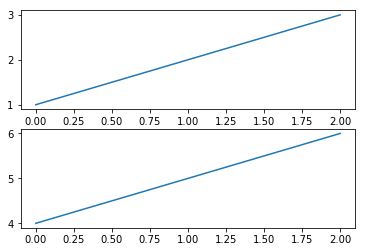

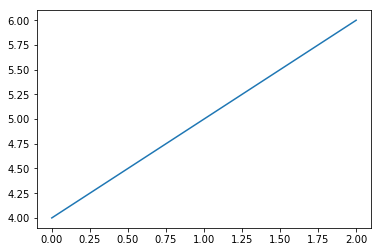

In [10]:
import matplotlib.pyplot as plt
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

# plt.figure(1)                # figure 1 current; subplot(212) still current
# plt.subplot(211)             # make subplot(211) in figure1 current
# plt.title('Easy as 1, 2, 3') # subplot 211 title

In [11]:
#general description of continuous variables
#display(training_data.describe())
display(training_data.median())
#How can the median of some of the categories be 0.00 exactly? Perhaps the medi

sku                  1955693.00
national_inv              14.00
lead_time                  8.00
in_transit_qty             0.00
forecast_3_month           0.00
forecast_6_month           0.00
forecast_9_month           0.00
sales_1_month              0.00
sales_3_month              1.00
sales_6_month              3.00
sales_9_month              4.00
min_bank                   0.00
potential_issue            0.00
pieces_past_due            0.00
perf_6_month_avg           0.84
perf_12_month_avg          0.82
local_bo_qty               0.00
deck_risk                  0.00
oe_constraint              0.00
ppap_risk                  0.00
stop_auto_buy              1.00
rev_stop                   0.00
went_on_backorder          0.00
dtype: float64

In [12]:
display(training_data.describe())

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,...,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06
mean,4.895098e+02,7.872267e+00,4.547493e+01,1.887439e+02,3.653390e+02,5.362801e+02,5.691140e+01,1.784835e+02,3.522319e+02,5.441272e+02,...,2.172666e+00,-1.014934e+00,-5.532225e-01,6.333207e-01,2.032538e-01,1.543825e-04,1.188090e-01,9.753675e-01,2.583545e-04,6.911927e-03
std,3.046168e+04,7.056024e+00,1.309357e+03,5.182992e+03,1.009962e+04,1.482576e+04,1.854775e+03,4.971129e+03,9.679297e+03,1.514871e+04,...,2.434021e+02,1.327273e+01,1.144580e+01,3.343933e+01,4.024199e-01,1.242412e-02,3.235638e-01,1.550025e-01,1.607134e-02,8.285021e-02
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,6.900000e-01,6.900000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.400000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,...,0.000000e+00,8.400000e-01,8.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,7.800000e+01,9.000000e+00,0.000000e+00,5.000000e+00,1.500000e+01,2.500000e+01,5.000000e+00,1.600000e+01,3.300000e+01,5.000000e+01,...,0.000000e+00,9.700000e-01,9.600000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,...,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Notice that the mean and median of each category differs quite drastically. This indicates a need for data normalization. 

In [13]:
from sklearn import tree 
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

In [77]:
from sklearn.preprocessing import normalize
continuous_features = raw_labels['continuous_features']
samples = training_data.sample(300000,random_state = 36)
#qty_related = ['national_inv', 'in_transit_qty', 'forecast_3_month', 
                   #'forecast_6_month', 'forecast_9_month', 'min_bank',
                   #'local_bo_qty', 'pieces_past_due', 'sales_1_month', 
                   #'sales_3_month', 'sales_6_month', 'sales_9_month',]
samples[continuous_features] = normalize(samples[continuous_features], axis=1)
testing_data[continuous_features] = normalize(testing_data[continuous_features], axis =1)

In [78]:
X_train_temp = pd.DataFrame(samples.drop('went_on_backorder',axis = 1).values, columns = raw_labels['feature_columns'])
y_train_temp = samples['went_on_backorder'].values
X_test_temp = testing_data.drop('went_on_backorder', axis = 1).values
y_test_temp = testing_data['went_on_backorder'].values
train_test_dict = {'X_train': X_train_temp, 'y_train':y_train_temp, 'X_test':X_test_temp, 'y_test':y_test_temp}
#print(X_train_temp.shape)
#print(y_train_temp.shape)
#display(X_train_temp)
results_text = columns_continuous_features_extract(X_train_temp)
print type(X_train_temp['lead_time'].values[0]) == np.float
print results_text['continuous_features']

True
['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty']


In [75]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
X = training_data.drop('went_on_backorder', axis=1).values
y = training_data['went_on_backorder'].values
sss.get_n_splits(X, y)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


train_test_dict = {'X_train': X_train, 'y_train':y_train, 'X_test':X_test, 'y_test':y_test}

In [79]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 12, ratio = 1.0)
x_smote_training_data, y_smote_training_data = sm.fit_sample(X_train_temp, y_train_temp)
print(np.bincount(y_smote_training_data))
train_test_dict = {'X_train': x_smote_training_data, 'y_train':y_smote_training_data, 'X_test':X_test_temp, 'y_test':y_test_temp}

[297929 297929]


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 12, ratio = 1.0)
x_smote_training_data, y_smote_training_data = sm.fit_sample(X_train, y_train)
print(np.bincount(y_smote_training_data))
train_test_dict = {'X_train': x_smote_training_data, 'y_train':y_smote_training_data, 'X_test':X_test_temp, 'y_test':y_test_temp}

0.0
0.0


//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


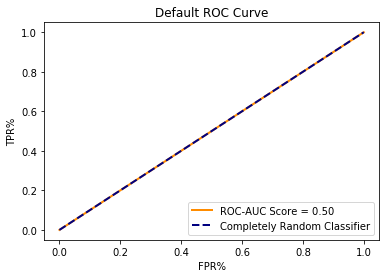

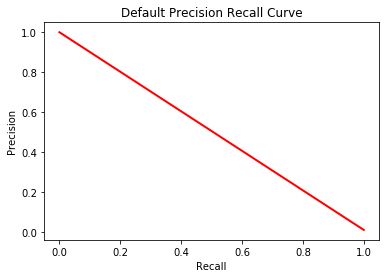

//anaconda/lib/python2.7/site-packages/sklearn/calibration.py:555: RuntimeWarning: invalid value encountered in true_divide
  y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())


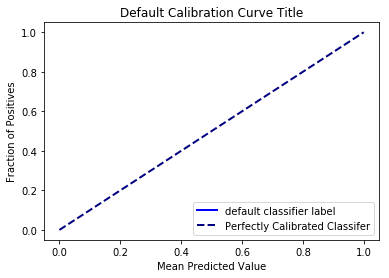

In [17]:
#majority classifier (baseline #1)
from sklearn.dummy import DummyClassifier
# clf_dummy = DummyClassifier(strategy='most_frequent', random_state =0)
# clf_dummy.fit(x_smote_training_data, y_smote_training_data)
# clf_dummy_predictions = clf_dummy.predict(X_test_temp)
# #accuracy score
# print(clf_dummy.score(X_test_temp, y_test_temp))
# #recall score
# clf_dummy_recall = recall_score(y_test_temp,clf_dummy_predictions)
# print clf_dummy_recall
# #precision score 
# clf_dummy_precision = precision_score(y_test_temp, clf_dummy_predictions)
# print clf_dummy_precision

dummy_clf = clfSingleAnalysis(clf = DummyClassifier(strategy ='most_frequent', random_state = 0),train_test_dict = train_test_dict)

0.0
0.0


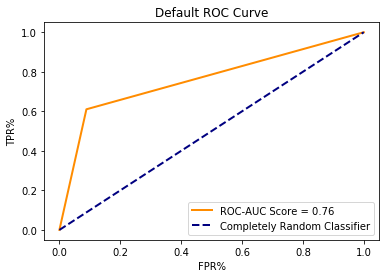

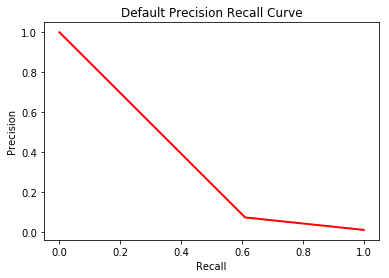

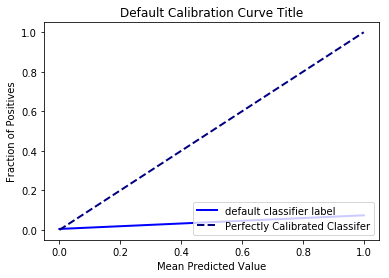

In [18]:
#baseline #2 classifier decision tree stump
from sklearn import tree
# clf_stump = tree.DecisionTreeClassifier(max_depth=1)
# clf_stump.fit(x_smote_training_data, y_smote_training_data)
# clf_stump_predictions = clf_stump.predict(X_test_temp)
# clf_stump_predictions_proba = clf_stump.predict_proba(X_test_temp)
# print(recall_score(y_test_temp,clf_stump_predictions))
# print(precision_score(y_test_temp, clf_stump_predictions))
# roc_plot(y_test_temp,clf_stump_predictions_proba, title = "Decision Stump ROC")
# precision_recall_plot(y_test_temp, clf_stump_predictions_proba, title = 'Decision Stump Precision-Recall Curve')
# calibration_plot(y_test_temp, clf_stump_predictions_proba, title = 'Un-Calibrated Decision Stump Calibration Curve',classifier_label = 'Decision Stump')
pred_proba = clfSingleAnalysis(clf=tree.DecisionTreeClassifier(max_depth = 1),train_test_dict = train_test_dict)


In [17]:
print pred_proba['clf_pred_proba']

[[ 0.99776013  0.00223987]
 [ 0.99776013  0.00223987]
 [ 0.99776013  0.00223987]
 ..., 
 [ 0.99776013  0.00223987]
 [ 0.99776013  0.00223987]
 [ 0.99776013  0.00223987]]


0.0568356374808
0.340229885057


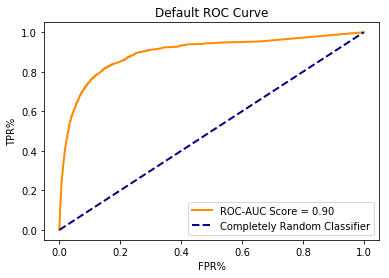

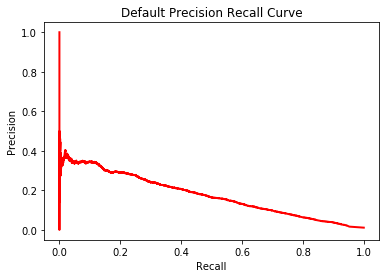

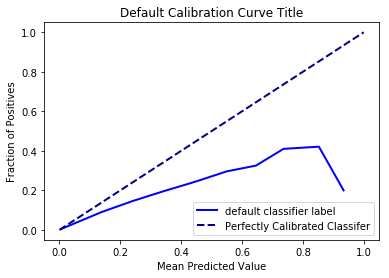

{'calibration_dict': {'frac_of_pos': array([ 0.00532917,  0.09137056,  0.14765458,  0.19647059,  0.24466572,
          0.29610829,  0.3253012 ,  0.41      ,  0.42105263,  0.2       ]),
  'mean_pred_val': array([ 0.0065463 ,  0.14026061,  0.24359841,  0.34376649,  0.44797256,
          0.54953474,  0.64566689,  0.73613741,  0.85252076,  0.93370903])},
 'clf': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=20, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 'clf_pred': array([0, 0, 0, ..., 0, 0, 0]),
 'clf_pred_proba': array([[  9.99998624e-01,   1.37602055e-06],
        [  1.00000000e+00,   0.00000000e+00],
        [  1.00000000e+00,   0.00000000e+00],
        ...

In [80]:
#Without any preprocessing, normalization, just using the out-of-the-box Random Forest Classifier
#strange thing is that as the number of trees grow, the model's F1 score gets lower and lower
#keep in mind that F1 score is affected by class imbalance, refer to paper
from sklearn.ensemble import RandomForestClassifier
# clf_temp = RandomForestClassifier(n_estimators=100, max_depth = 15)
# #clf_temp = clf_temp.fit(X_train_temp, y_train_temp)
# clf_temp = clf_temp.fit(x_smote_training_data, y_smote_training_data)
# y_predict_temp = clf_temp.predict(X_test_temp)
# score_temp = metrics.f1_score(y_test_temp, y_predict_temp)
# y_predict_temp_proba = clf_temp.predict_proba(X_test_temp)
# print score_temp
clfSingleAnalysis(clf=RandomForestClassifier(n_estimators=100, max_depth=20),train_test_dict=train_test_dict)

In [ ]:
import matplotlib.pyplot as plt 
#taking a look at confusion matrix for the base Random Forest Classifier without class balancing
from sklearn.metrics import confusion_matrix 
import pandas as pd
import seaborn as sn
cm = confusion_matrix(y_test_temp, y_predict_temp)
display(cm)
sn.heatmap(cm)

In [ ]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.cross_validation import KFold
kfold = KFold(len(X_train_temp),n_folds = 10)
calibrated_clf_temp = CalibratedClassifierCV(clf_temp, cv = kfold, method = 'isotonic')
calibrated_clf_temp = calibrated_clf_temp.fit(x_smote_training_data, y_smote_training_data)
y_predict_calibrated = calibrated_clf_temp.predict(X_test_temp)
score_calibrated = metrics.f1_score(y_test_temp,y_predict_calibrated)
y_predict_calibrated_proba = calibrated_clf_temp.predict_proba(X_test_temp)

In [ ]:
calibrated_clf_precision_score = precision_score(y_test_temp, y_predict_calibrated)
calibrated_clf_recall_score = recall_score(y_test_temp, y_predict_calibrated)
print calibrated_clf_precision_score
print calibrated_clf_recall_score
print y_predict_calibrated.shape
print y_smote_training_data.shape
print x_smote_training_data.shape
print sum(y_smote_training_data)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
y_train_sample = samples['went_on_backorder'].values
PCA_train = PCA(n_components=5)
#X_train_reduced = PCA_train.fit_transform(X_train_temp)
X_train_reduced = PCA_train.fit_transform(x_smote_training_data)
clf_PCA_only = RandomForestClassifier(n_estimators=100)
#clf_PCA_only = clf_PCA_only.fit(X_train_reduced, y_train_sample)
clf_PCA_only = clf_PCA_only.fit(X_train_reduced, y_smote_training_data)
X_dataset_test = testing_data.drop('went_on_backorder', axis=1).values
y_dataset_test = testing_data['went_on_backorder'].values
X_dataset_test_reduced = PCA_train.fit_transform(X_dataset_test)
y_dataset_test_predictions = clf_PCA_only.predict_proba(X_dataset_test_reduced)
#test_score = metrics.f1_score(y_dataset_test, y_dataset_test_predictions)
#print test_score 

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin,TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances
from sklearn.utils.estimator_checks import check_estimator
from sklearn.decomposition import PCA

In [ ]:
class custom_PCA(BaseEstimator,TransformerMixin):
    import pandas as pd 
    
    def __init__(self,n_components = None, smoted = False, smoted_ratio = 1.0):
        self.smoted_ratio = smoted_ratio
        self.smoted = smoted
        self.n_components = n_components
        self.pca = PCA(n_components = self.n_components)
        self.X_cont_only = []
        self.X_non_cont = []
    
    def continuous_feature_extract(self, X_original):
        #print X_original
        X_dict = {}
        results_dict = columns_continuous_features_extract(X_original)
        continuous_features = results_dict['continuous_features']
        #print continuous_features
        #all_features = results_dict['columns']
        #print all_features
        #X_original = pd.DataFrame(X_original, columns = all_features[0:len(all_features)])
        #print "X_original is"
        #print X_original
        X_cont_only = X_original[continuous_features]
        #print "X_cont_only is"
        #print X_cont_only
        X_non_cont = pd.DataFrame(X_original).drop(continuous_features, axis =1)
        print "X_non_cont is"
        print X_non_cont 
        X_dict['X_non_cont'] = X_non_cont
        X_dict['X_cont_only'] = X_cont_only
        return X_dict
        
    
    def fit(self, X_original, y = None):
        
        X_dict = self.continuous_feature_extract(X_original)
        X_cont_only = X_dict['X_cont_only']
        #print "X_cont_only is"
        #print X_cont_only
        #X_non_cont = X_dict['X_non_cont']
        #print "X_non_cont is"
        #print X_non_cont 
        self.X_cont_only = self.pca.fit(X_cont_only)
        return self.X_cont_only
#         X_joined =X_cont_only.join(X_non_cont)
        
#         if smoted == True:
#             smote_results = {}
#             sm = SMOTE(random_state = 12, ratio = self.smoted_ratio)
#             x_smote_training_data, y_smote_training_data = sm.fit_sample(X_joined, y)
#             smote_results = {'X': x_smote_training_data, 'y':y_smote_training_data}
#             return smote_results
        
#         else:
#             return X_joined
        

    def fit_transform(self,X_original, y=None):
        X_dict = self.continuous_feature_extract(X_original)
        X_cont_only = X_dict['X_cont_only']
        #print X_cont_only.shape
        X_non_cont = pd.DataFrame(X_dict['X_non_cont'])
        #print X_non_cont.shape
        X_cont_only = pd.DataFrame(self.pca.fit_transform(X_cont_only))
        X_joined = pd.DataFrame(X_cont_only).merge(X_non_cont)
        #print X_joined.shape
        
        if self.smoted == True:
            smote_results = {}
            sm = SMOTE(random_state = 12, ratio = self.smoted_ratio)
            x_smote_training_data, y_smote_training_data = sm.fit_sample(X_joined, y)
            smote_results = {'X': x_smote_training_data, 'y':y_smote_training_data}
            return smote_results
        
        else:
            return X_joined
    
    
    
    def transform(self,X_original, y=None):
        X_dict = self.continuous_feature_extract(X_original)
        X_cont_only = X_dict['X_cont_only']
        X_non_cont = X_dict['X_non_cont']
        X_cont_only = pd.DataFrame(self.pca.transform(X_cont_only))
        X_joined = X_cont_only.join(X_non_cont)
        
        if self.smoted == True:
            smote_results = {}
            sm = SMOTE(random_state = 12, ratio = self.smoted_ratio)
            x_smote_training_data, y_smote_training_data = sm.fit_sample(X_joined, y)
            smote_results = {'X': x_smote_training_data, 'y':y_smote_training_data}
            return smote_results
        
        else:
            return X_joined
#print X_train_temp
#test_pca = custom_PCA(n_components = 5,smoted=True)
#test_fit = test_pca.fit(X_train_temp, y_train_temp)
test_pca = custom_PCA(n_components = 9, smoted = True)
test_X = test_pca.fit_transform(X_train_temp, y_train_temp)
#display(test_X['X_cont_only'])
#display(test_X['X_non_cont'])
display(pd.DataFrame(test_X['X']))

In [ ]:
# class JamesTransformer(BaseEstimator, TransformerMixin):
    
#     from sklearn.decomposition import PCA
    
#     def __init__(self,n_components = None, **kwargs):
#         self.n_components = n_components
#         self.pca = PCA(self.n_components)
#         self.X_dict = None
#         self.components_ = None 
#     def continuous_feature_extract(self, X_original):
#         print X_original.shape
#         X_dict = {}
#         results_dict = columns_continuous_features_extract(X_original)
#         continuous_features = results_dict['continuous_features']
#         #print continuous_features
#         #all_features = results_dict['columns']
#         #print all_features
#         #X_original = pd.DataFrame(X_original, columns = all_features[0:len(all_features)])
#         #print "X_original is"
#         #print X_original
#         X_cont_only = X_original[continuous_features]
#         print X_cont_only.shape
#         #print "X_cont_only is"
#         #print X_cont_only
#         X_non_cont = pd.DataFrame(X_original).drop(continuous_features, axis =1)
#         print X_non_cont.shape
#         #print "X_non_cont is"
#         #print X_non_cont 
#         X_dict['X_non_cont'] = X_non_cont
#         X_dict['X_cont_only'] = X_cont_only
#         return X_dict
    
    
#     def transform(self, X, y=None, **kwargs):
#         X_cont_only =self.X_dict['X_cont_only']
#         X_transformed = np.dot(X_cont_only, self.components_.T)
#         if (y.all()!=None):
#             print "shape of y is"
#             print y.shape
#         return X_transformed
    
#     def fit_transform(self, X, y= None, **kwargs):
#         if (y.all()!=None):
#             print "shape of y is"
#             print y.shape
# #         check_is_fitted(self, ['mean_', 'components_'], all_or_any=all)
#         X_fitted = self.fit(X)
#         self.components_ = X_fitted.components_
# #         self.X_dict = self.continuous_feature_extract(X)
#         X_cont_only = self.X_dict['X_cont_only']
# #         print X_cont_only.shape
# #         display (X_cont_only)
# #         #X_non_cont = pd.DataFrame(X_dict['X_non_cont'])
# #         X_temp = self.pca.fit_transform(X_cont_only)
# #         #X = pd.DataFrame(X_cont_only).join(X_non_cont)
# #         return X_temp
#         #X = check_array(X)
#         #if self.mean_ is not None:
#             #X = X - self.mean_
#         X_transformed = np.dot(X_cont_only, self.components_.T)
#         #if self.whiten:
#             #X_transformed /= np.sqrt(self.explained_variance_)
#         return X_transformed
         
#     def fit(self, X, y=None, **kwargs):
#         if (y.all()!=None):
#             print "shape of y is"
#             print y.shape
#         self.X_dict = self.continuous_feature_extract(X)
#         X_cont_only = self.X_dict['X_cont_only']
#         X_fitted = self.pca.fit(X_cont_only)
#         self.components_ = X_fitted.components_
#         return self

# # print x_smote_training_data.shape
# # print y_smote_training_data.shape
# # print X_test_temp.shape
# # print check_array(X_test_temp)

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.svm import LinearSVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.utils.estimator_checks import check_estimator
# from sklearn.datasets import load_digits

# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV,StratifiedKFold

# #pipeline test
# pipe = Pipeline([('reduce_dim', JamesTransformer(n_components = 2)),('classify', RandomForestClassifier())])
# C_OPTIONS = [1]
# N_COMPONENTS = [2]
# param_grid = [{'classify__n_estimators': C_OPTIONS},
#               {'reduce_dim__n_components':N_COMPONENTS}
#              ]
# #scoring = {'f1_score':'f1_micro', 'roc_auc_score':'roc_auc'}
# #scoring = {'roc_auc_score':'roc_auc'}
# grid = GridSearchCV(pipe, n_jobs=1, param_grid=param_grid,scoring = 'roc_auc')
# #cv=StratifiedKFold(n_splits=2)
# #digits = load_digits()
# #display(digits)
# #X.as_matrix().astype(np.float)
# #print X_train_temp.as_matrix()
# #print y_train_temp
# print X_train_temp.shape
# print y_train_temp.shape
# grid.fit(X_train_temp, y_train_temp)
# #print grid
# #grid.predict(X_test_temp)
# #bestie = grid.best_estimator_
# #print(grid.cv_results_)

In [ ]:
# print bestie
# print grid.best_score_
# temp_predict_proba = grid.predict_proba(X_test_temp)

In [84]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier


clf1 = LogisticRegression(random_state=1)
clf2=RandomForestClassifier(n_estimators=100, max_depth=20)
clf3 = GaussianNB()
clf4 = GradientBoostingClassifier(n_estimators=800, learning_rate=0.01,
    max_depth=1, random_state=0)
#eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
#eclf = VotingClassifier(estimators=[('lr', clf1), ('gnb', clf3),('rf',clf2),('gbc',clf4)], voting='soft')
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2),('gcb',clf4)], voting='soft')


params = {'lr__C': [100.0]}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=StratifiedKFold(n_splits=3))
#clfSingleAnalysis(grid,train_test_dict)

0.206989247312
0.271126760563


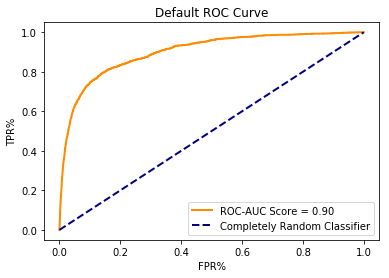

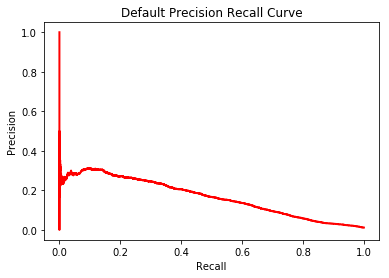

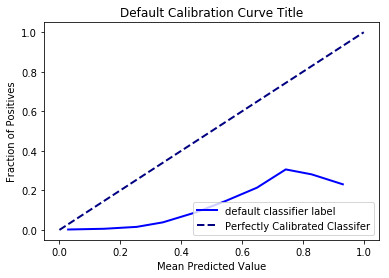

{'calibration_dict': {'frac_of_pos': array([ 0.00211198,  0.00576814,  0.01539865,  0.0382755 ,  0.08857454,
          0.14547677,  0.21361816,  0.30603889,  0.2810219 ,  0.23076923]),
  'mean_pred_val': array([ 0.02864798,  0.14656281,  0.25397216,  0.33991242,  0.4474448 ,
          0.544723  ,  0.64899949,  0.74364793,  0.82875402,  0.9311524 ])},
 'clf': GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
        error_score='raise',
        estimator=VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
           verbose=0, warm_start...        warm_start=False))],
          flatten_transform=None, n_jobs=1, voting='soft', weights=None),
        fit_params=None, iid=True, n_jobs=1, param_grid={'lr__C': [100.0]},
        pre_dispatch='2*n_jobs', refit

In [85]:
clfSingleAnalysis(grid,train_test_dict)

In [54]:
clf_test = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, 
           max_depth=1, random_state=0)

0.625576036866
0.121142262215


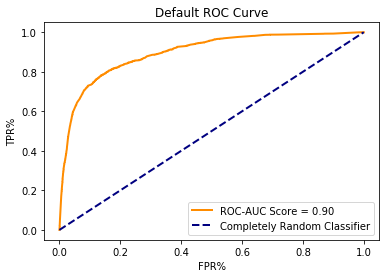

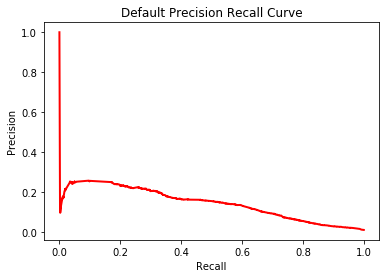

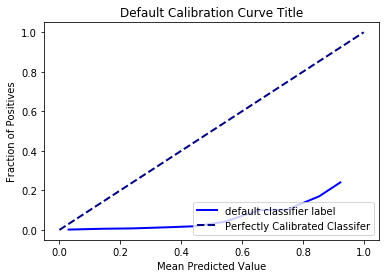

{'calibration_dict': {'frac_of_pos': array([ 0.00172574,  0.00569015,  0.00775827,  0.01300209,  0.01860692,
          0.04134008,  0.10003004,  0.10167638,  0.16982025,  0.24050633]),
  'mean_pred_val': array([ 0.03012211,  0.13702491,  0.24165653,  0.34836977,  0.44522889,
          0.54377035,  0.65590444,  0.74613013,  0.85326993,  0.92309445])},
 'clf': GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.01, loss='deviance', max_depth=1,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=1000,
               presort='auto', random_state=0, subsample=1.0, verbose=0,
               warm_start=False),
 'clf_pred': array([0, 0, 0, ..., 0, 0, 0]),
 'clf_pred_proba': array([[ 0.98396117,  0.01603883],
        [ 0.98007985,  0.01992015],
        [ 0.98396117,  0.0

In [55]:
clfSingleAnalysis(clf_test,train_test_dict)

In [ ]:
def stacked_data_preprocess(train, test):
    #create dataset A. Dataset A is the training set for all the sub-models within stacked generalization.
    
    from sklearn.preprocessing import normalize
    continuous_features = raw_labels['continuous_features']
    samples = training_data.sample(300000,random_state = 36)
    samples[continuous_features] = normalize(samples[continuous_features], axis=1)
    testing_data[continuous_features] = normalize(testing_data[continuous_features], axis =1)
    

In [ ]:
def submodel_transform(submodel_list, X, y):
    for submodel in submodel_list:
        clf_temp = submodel
        clf_temp = clf_temp.fit(X, y)
        pred_temp = clf_temp.predict(X, y_test)
        #pred_proba_temp = clf_temp.predict_proba(X_test, y_test)
        stack_X_train.append(pred_temp)
    stack_y_train = y_train
    stack_X_train = np.matrix(stack_X_train)
    
    

In [86]:
def stacked_gen_clf(submodel_list, agg_model, X_train = None, 
                    y_train = None, X_test = None, y_test = None 
                    train_test_dict = None, data_A = None, data_B = None, data_C = None):
    
    import numpy as np 
    #we will assume all the submodels will have a fit and predict method
    #basically fit all the data and make a prediction 
    
    #this is based on top Kaggler's Kazanova's Stacking Made Easy Article
    #X_train_A and y_train_A make up the dataset A 
    #Dataset A is basically
    X_train_A =[]
    y_train_A =[]
    X_train_test_B = []
    y_train_test_B = []
    X_train_C = []
    y_train_C = []

     
    for submodel in submodel_list:
        clf_temp = submodel
        clf_temp = clf_temp.fit(X_train, y_train)
        pred_temp = clf_temp.predict(X_test, y_test)
        #pred_proba_temp = clf_temp.predict_proba(X_test, y_test)
        stack_X_train.append(pred_temp)
    stack_y_train = y_train
    stack_X_train = np.matrix(stack_X_train)
    
    #basically the predictions of the sub-models are now your features while your original labels are y_train 
    agg_model = agg_model.fit(stack_X_train, stack_y_train)
    agg_model_pred = agg_model.predict()
        
    return None

SyntaxError: invalid syntax (<ipython-input-86-b2fafb45264f>, line 3)